<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <h1><span style="color: red;">In the current dataset, there are 11 features and one binary target. A brief information about the features are given below</span></h1>
    <p>
        
1. **id**: Identification number of the individual.
2. **gender**: Gender of the individual.
3. **hypertension**: Health related parameter, does person have hypertension.
4. **heart_disease**: Health related parameter, does person have heart disease.
5. **ever_married**: Personal information, is person married on not?
6. **work_type**: Nature of work place.
7. **Residence_type**: Residence type of the individual.
8. **avg_glucose_level**: average glucose level in blood for the individual.
9. **bmi**: body mass index of the individual.
10. **smoking_status**: Habitual information. Current smoking status of individual.
11. **stroke**: Our taget, is person suffered heart attack?</p>
</div>




In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [84]:
# loading data
df = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <h4><span style="color: red;">Initial Insights About Dataset</span></h4>
    <p>
        
1. Data from bmi feature is missing.
2. Both Categorical and numerical features are present.
    - **Categorical Features**: gender, ever_married, work_type, Residence_type, smoking_status
    - **Binary Numerical Features**: hypertension,heart_disease, stroke
    - **Continous Numerical Features**: age, avg_glucose_level, bmi 
3. Most of the data is categorical which need a special attention to visulaize those
4. Feature extraction can  be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.</p>
</div>

In [86]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [88]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [89]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [90]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [91]:
df["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [92]:
df["smoking_status"].value_counts(normalize = True)

smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64

In [93]:
df["gender"].value_counts(normalize = True)

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

In [54]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Only bmi feature has some missing data which need to be filled with median of the same column. For missing values, binning was applied for all continuous values, binning values ​​are taken from following articles.


* [body mass index binning](https://www.medicalnewstoday.com/articles/323446#body-mass-index)
* [Age binning](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)
* [average glucose binning](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)

In [55]:
## binning of numerical variables

df['bmi_category'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_category'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])


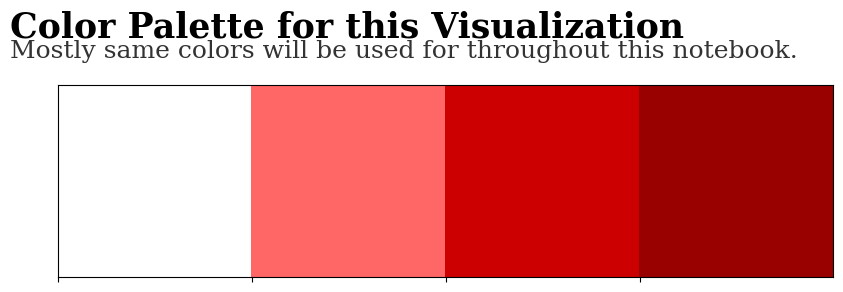

In [56]:
# color palette for visualizations
colors = ['#ffffff', '#ff6666', '#cc0000', '#990000']
palette = sns.color_palette(palette=colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()



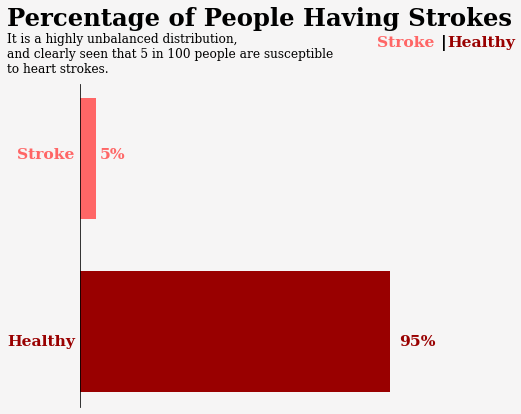

In [57]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#ff6666')
plt.text(-1150,-0.08, 'Healthy',{'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#990000'})
plt.text(5000,-0.08, '95%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#990000'})
ax.barh([0], x.stroke[0], height = 0.7, color = '#990000')
plt.text(-1000,1, 'Stroke', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff6666'})
plt.text(300,1, '5%',{'font':'Serif', 'weight':'bold','size':'16','color':'#ff6666'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'Percentage of People Having Strokes' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
plt.text(4650,1.65, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff6666'})
plt.text(5650,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(5750,1.65, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#990000'})
plt.text(-1150,1.5, 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible \nto heart strokes.', 
        {'font':'Serif', 'size':'12.5','color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <h1><span style="color: red;">Evaluation Results</span></h1>
    <p>The distribution shows that 5 out of every 100 people in our sample have strokes, indicating highly unbalanced data. With a null accuracy of 95%, any basic model predicting strokes randomly would achieve 95% accuracy. Therefore, oversampling or undersampling is necessary during modeling to achieve optimal results.</p>
</div>

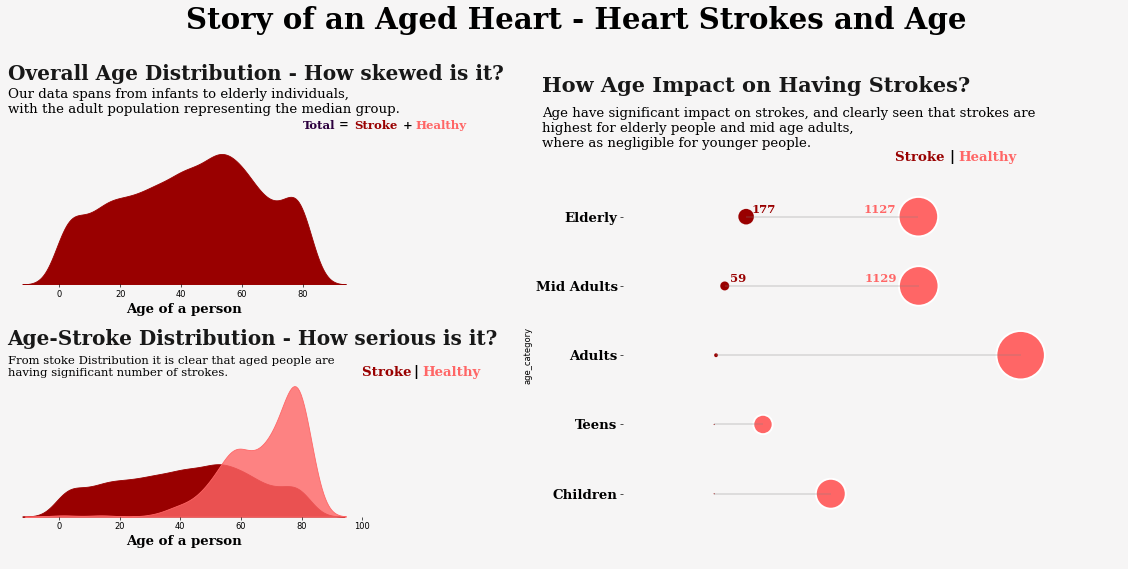

In [ ]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_age = df[df['stroke'] == 1].age_category.value_counts()
healthy_age = df[df['stroke'] == 0].age_category.value_counts()

ax1.hlines(y = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'], xmin = [644,270,1691,1129,1127], 
          xmax = [1,1,11,59,177], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#990000', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#ff6666', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#990000'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#ff6666'})
ax1.text(-950,5., 'Age have significant impact on strokes, and clearly seen that strokes are \nhighest for elderly people and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#990000'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff6666'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#990000'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff6666'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#990000', alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17, 0.021, 'Our data spans from infants to elderly individuals, \nwith the adult population representing the median group.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#990000','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#ff6666','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#990000' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#ff6666')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#990000'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#ff6666'})

fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()


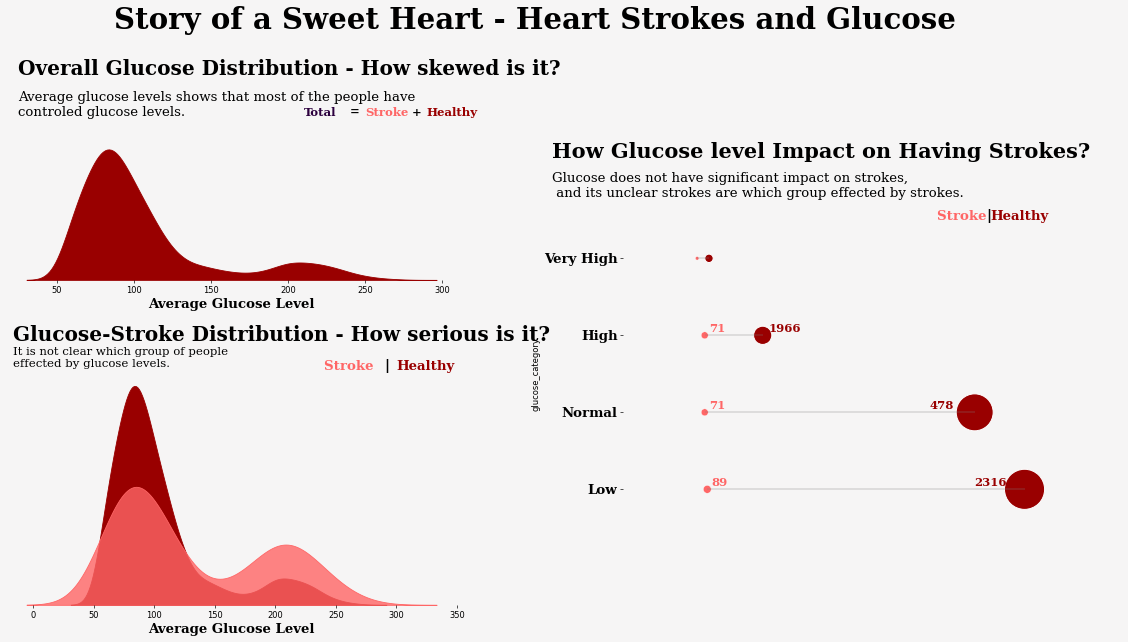

In [59]:
# sugar distribution plots


fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:10]) #distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot
ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_glu = df[df['stroke'] == 1].glucose_category.value_counts()
healthy_glu = df[df['stroke'] == 0].glucose_category.value_counts()

ax1.hlines(y = ['Low', 'Normal', 'High', 'Very High'], xmin = [2316,1966,478,101], 
          xmax = [89,71,71,18], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_glu.index, x = stroke_glu.values, s = stroke_glu.values, color = '#ff6666', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_glu.index, x = healthy_glu.values, s = healthy_glu.values, color = '#990000', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Low', 'Normal', 'High', 'Very High'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-1000,4.3, 'How Glucose level Impact on Having Strokes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
ax1.text(1700,3.5, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff6666'})
ax1.text(2050,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2075,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#990000'})
ax1.text(-1000,3.8, 'Glucose does not have significant impact on strokes,\n and its unclear strokes are which group effected by strokes.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_glu.values[0] + 30,0.05, stroke_glu.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff6666'})
ax1.text(healthy_glu.values[0] + -355,0.05, healthy_glu.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#990000'})

ax1.text(stroke_glu.values[2] + 30,1.05, stroke_glu.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff6666'})
ax1.text(healthy_glu.values[2] + 1170,1.05, healthy_glu.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#990000'})

ax1.text(stroke_glu.values[1] + 30,2.05, stroke_glu.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#ff6666'})
ax1.text(healthy_glu.values[1] - 1450,2.05, healthy_glu.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#990000'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#990000', alpha = 1, )
ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(25,0.025,'Overall Glucose Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(25,0.020, 'Average glucose levels shows that most of the people have \ncontroled glucose levels.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(210,0.020, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(240,0.02, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.02, 'Stroke',{'font':'Serif', 'size':'14','color': '#ff6666','weight':'bold'})
ax2.text(280,0.02, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(290,0.02, 'Healthy',{'font':'Serif', 'size':'14','color': '#990000','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#990000' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#ff6666')

ax3.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Glucose-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-17,0.0176,'It is not clear which group of people \neffected by glucose levels.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(240,0.0174, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff6666'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#990000'})


fig.text(0.2,1.07,'Story of a Sweet Heart - Heart Strokes and Glucose',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()


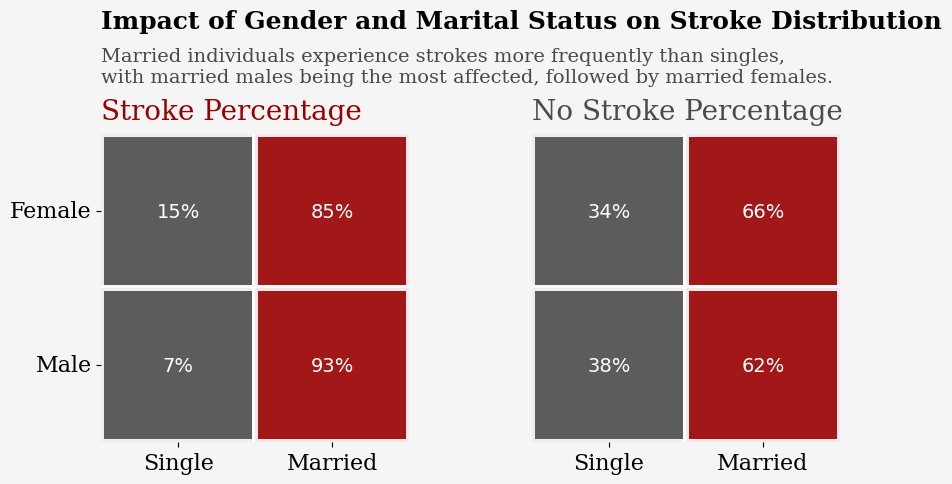

In [60]:
import matplotlib

fig = plt.figure(figsize=(10,4),dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


col1 = ["#4b4b4c","#990000"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#990000"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['ever_married']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha=0.9)


ax0.text(0, -0.69, 'Impact of Gender and Marital Status on Stroke Distribution', {'font':'Serif', 'color':'black', 'weight':'bold','size':18})
ax0.text(0, -0.34, 'Married individuals experience strokes more frequently than singles, \nwith married males being the most affected, followed by married females.', {'font':'Serif', 'color':'black','size':14}, alpha=0.7)

ax0.text(0, -0.1, 'Stroke Percentage', {'font':'serif', 'color':"#990000", 'size':20})
ax1.text(0, -0.1, 'No Stroke Percentage', {'font':'serif', 'color':"#4b4b4c", 'size':20})

# Etiketleri doğrudan set_xticklabels içinde stil parametreleriyle değiştirmek yerine plt.setp kullanıldı.
ax0.set_xticklabels(['Single', 'Married'])
ax1.set_xticklabels(['Single', 'Married'])
ax0.set_yticklabels(['Female', 'Male'], rotation=0)

plt.setp(ax0.get_xticklabels(), fontname='Serif', color='black', fontsize=16)
plt.setp(ax1.get_xticklabels(), fontname='Serif', color='black', fontsize=16)
plt.setp(ax0.get_yticklabels(), fontname='Serif', color='black', fontsize=16)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)

plt.show()

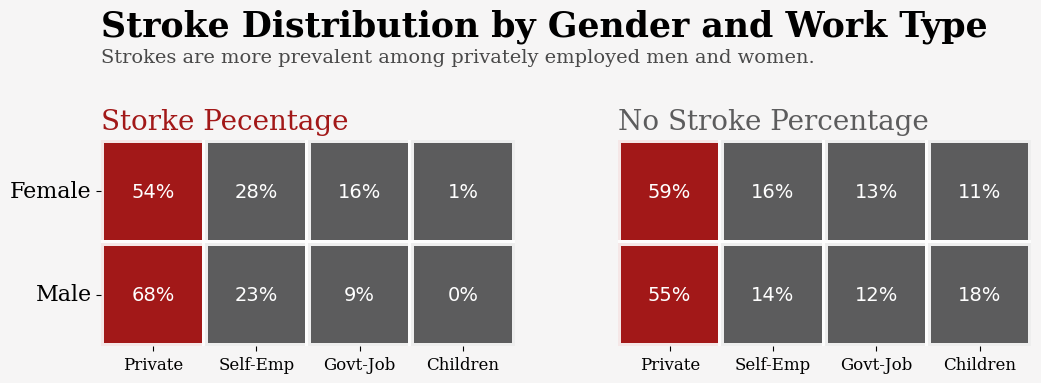

In [61]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
work_order = ['Private', 'Self-employed','Govt_job', 'children']


col1 = ["#4b4b4c","#990000"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#990000"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['work_type']],normalize='index').loc[gender_order,work_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['work_type']], normalize='index').loc[gender_order,work_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Stroke Distribution by Gender and Work Type', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.75, 'Strokes are more prevalent among privately employed men and women.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#990000", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#4b4b4c", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Private', 'Self-Emp', 'Govt-Job', 'Children'], fontdict={'fontname': 'serif', 'color': 'black', 'size': 12})
ax1.axes.set_xticklabels(['Private', 'Self-Emp', 'Govt-Job', 'Children'], fontdict={'fontname': 'serif', 'color': 'black', 'size': 12})

ax0.axes.set_yticklabels(gender_order, fontdict={'fontname': 'serif', 'color': 'black', 'size': 16}, rotation=0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

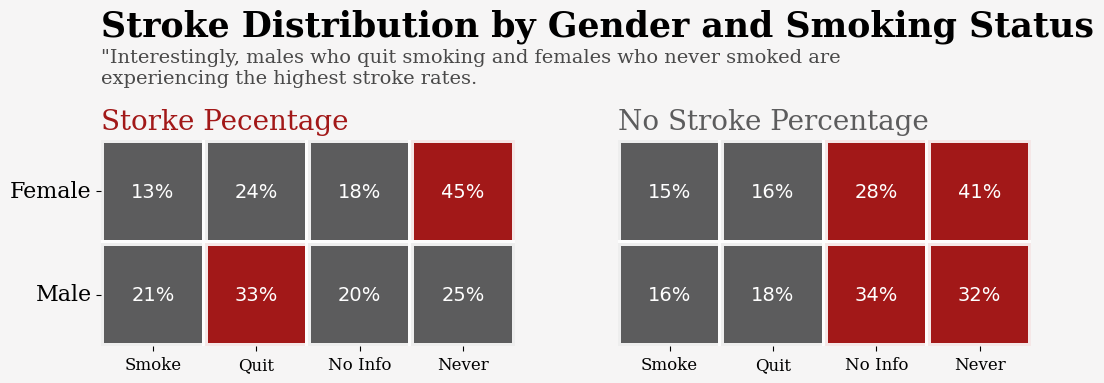

In [62]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
smoking_order = ['smokes', 'formerly smoked', 'Unknown', 'never smoked']


col1 = ["#4b4b4c","#990000"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#990000"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['smoking_status']],normalize='index').loc[gender_order,smoking_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['smoking_status']], normalize='index').loc[gender_order,smoking_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Stroke Distribution by Gender and Smoking Status', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.55, '"Interestingly, males who quit smoking and females who never smoked are \nexperiencing the highest stroke rates.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#990000", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#4b4b4c", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Smoke', 'Quit','No Info', 'Never'], fontsize=12, color='black', fontname='Serif')
ax1.axes.set_xticklabels(['Smoke', 'Quit','No Info', 'Never'], fontsize=12, color='black', fontname='Serif')

ax0.axes.set_yticklabels(gender_order, fontsize=16, color='black', fontname='Serif', rotation=0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

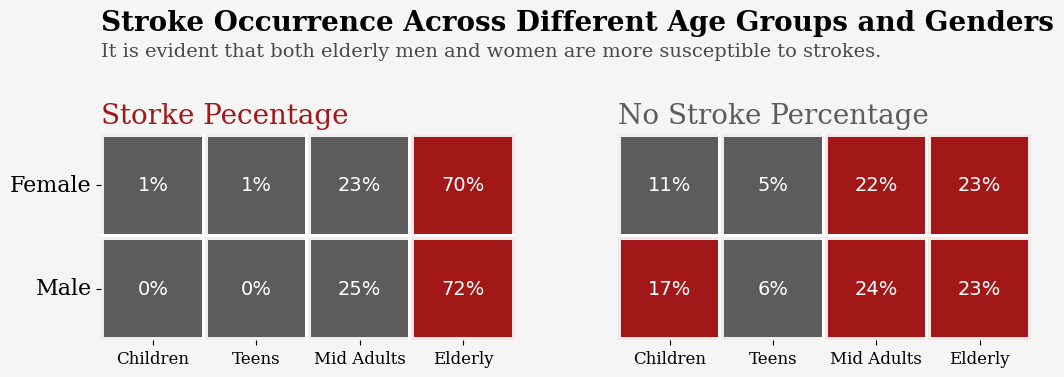

In [63]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
age_order = ['Children', 'Teens', 'Mid Adults', 'Elderly']


col1 = ["#4b4b4c","#990000"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#990000"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['age_category']],normalize='index').loc[gender_order,age_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['age_category']], normalize='index').loc[gender_order,age_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Stroke Occurrence Across Different Age Groups and Genders', {'font':'Serif', 'color':'black', 'weight':'bold','size':20})
ax0.text(0, -0.75, 'It is evident that both elderly men and women are more susceptible to strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#990000", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#4b4b4c", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(age_order, fontsize=12, color='black', fontname='Serif')
ax1.axes.set_xticklabels(age_order, fontsize=12, color='black', fontname='Serif')

ax0.axes.set_yticklabels(gender_order, fontsize=16, color='black', fontname='Serif', rotation=0)


ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

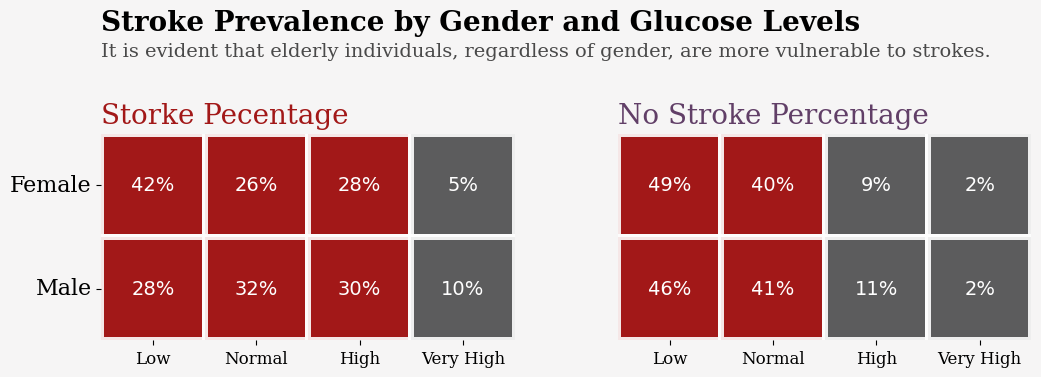

In [64]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']


col1 = ["#4b4b4c","#990000"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#990000"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['glucose_category']],normalize='index').loc[gender_order,glucose_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['glucose_category']], normalize='index').loc[gender_order,glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Stroke Prevalence by Gender and Glucose Levels', {'font':'Serif', 'color':'black', 'weight':'bold','size':20})
ax0.text(0, -0.75, 'It is evident that elderly individuals, regardless of gender, are more vulnerable to strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#990000", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.set_xticklabels(glucose_order, fontname='serif', color='black', size=12)
ax1.set_xticklabels(glucose_order, fontname='serif', color='black', size=12)

ax0.set_yticklabels(gender_order, fontname='serif', color='black', size=16, rotation=0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

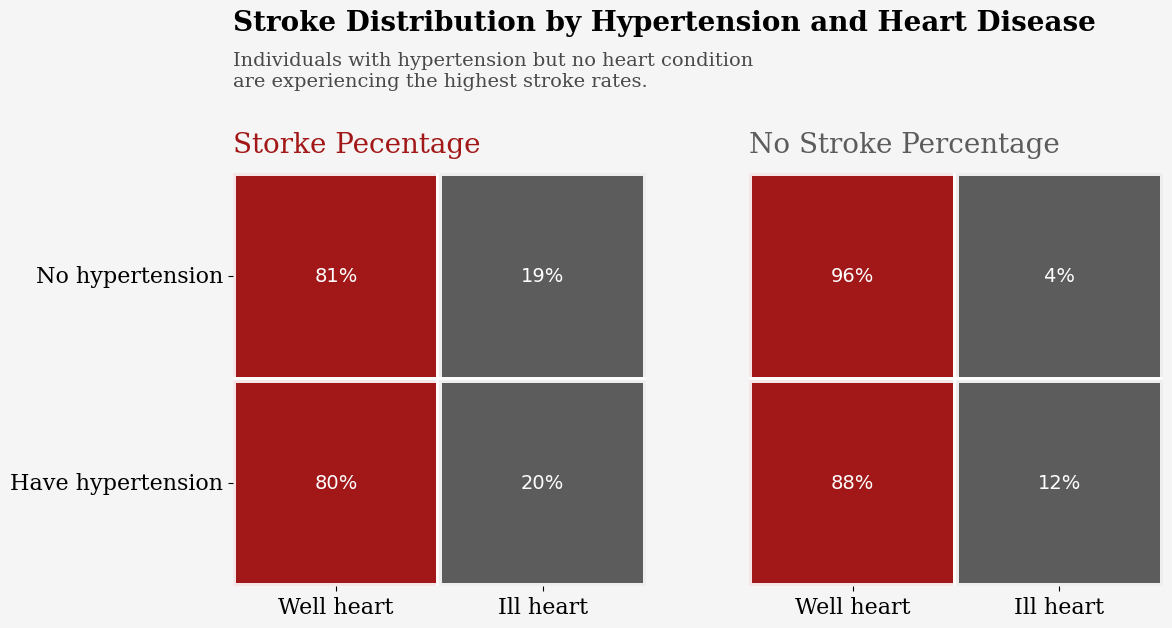

In [65]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


col1 = ["#4b4b4c","#990000"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#990000"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['hypertension'],[stroke['heart_disease']],normalize='index')
no_stroke = pd.crosstab(healthy['hypertension'],[healthy['heart_disease']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Stroke Distribution by Hypertension and Heart Disease', {'font':'Serif', 'color':'black', 'weight':'bold','size':20})
ax0.text(0, -0.42, 'Individuals with hypertension but no heart condition \nare experiencing the highest stroke rates.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#990000", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#4b4b4c", 'size':20}, alpha =0.9)

ax0.set_xticklabels(['Well heart', 'Ill heart'], fontname='serif', color='black', size=16)
ax1.set_xticklabels(['Well heart', 'Ill heart'], fontname='serif', color='black', size=16)

ax0.set_yticklabels(['No hypertension', 'Have hypertension'], fontname='serif', color='black', size=16, rotation=0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Prepare the data
X = df.drop(columns=['stroke', 'id'])  # Drop target and irrelevant columns
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['stroke']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate models
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Display results
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy:.2f}")

Logistic Regression: 0.94
Random Forest: 0.94
Support Vector Machine: 0.94
Decision Tree: 0.90
K-Nearest Neighbors: 0.94


In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [71]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [72]:
predictions = rfc.predict(X_test)

In [73]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9412915851272016


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1443    1]
 [  89    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



In [75]:
#Getting feature importances
rfc.feature_importances_

array([1.91621135e-01, 2.91354075e-02, 2.32401295e-02, 2.27171340e-01,
       1.83424276e-01, 3.49174652e-02, 0.00000000e+00, 2.45012590e-02,
       2.75302700e-05, 2.71954813e-02, 2.15890068e-02, 1.29795500e-03,
       3.31448424e-02, 2.42663496e-02, 2.74814941e-02, 2.31096345e-02,
       1.10198105e-02, 1.79354221e-02, 1.50483958e-02, 9.41836143e-04,
       5.68672798e-03, 7.07078760e-03, 2.52864176e-02, 2.04270767e-02,
       1.60810549e-02, 8.37916555e-03])

<Axes: >

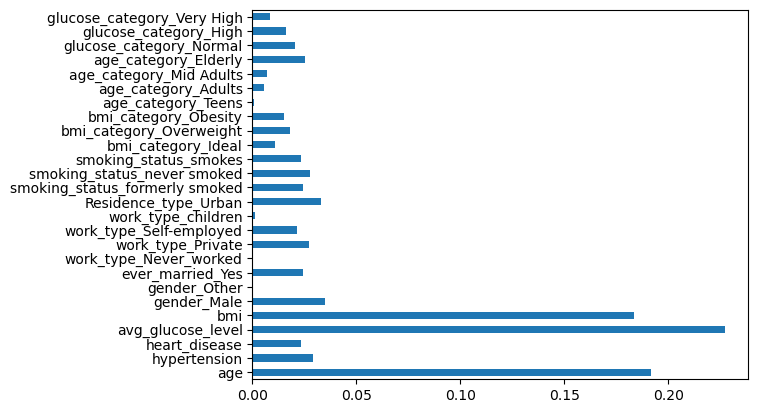

In [76]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [77]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.97, 0.03]])

In [80]:
from imblearn.over_sampling import SMOTE

# One-hot encode categorical variables
X = pd.get_dummies(df.drop(columns=['stroke']), drop_first=True)  # Features
y = df['stroke']  # Target

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [81]:
print(df.head())  # Check if last column has both 0s and 1s

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke bmi_category age_category glucose_category  
0       1      Obesity      Elderly             High  
1       1   Overwe

In [82]:
import pickle
saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
import joblib
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

joblib.dump(model, 'stroke.pkl')  # Corrected filename to 'stroke.pkl'

model = joblib.load('stroke.pkl')

In [68]:
import joblib
model = joblib.load('stroke.pkl')
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [69]:
import pickle

# Save the model to a file using pickle
with open('stoke.pkl', 'wb') as file:
    pickle.dump(model, file)

# To load the model back
with open('stroke.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model
print(loaded_model.predict(X_test))

AttributeError: 'numpy.ndarray' object has no attribute 'predict'